In [2]:
# Importar dependências

import random
from typing import NamedTuple, NewType, TypedDict
import pandas as pd
from time import perf_counter
import matplotlib.pyplot as plt

In [3]:
# Definir tipos


class Item(NamedTuple):
    name: str
    value: int
    weight: float


Knapsack = NewType("Knapsack", list[int])
"""
Mochila é uma lista de 0s e 1s, onde 1 indica que o item está na mochila e 0 indica que não está.

Por exemplo, se a mochila for [1, 0, 1, 0], isso significa que o primeiro e o terceiro itens estão na mochila.
"""

'\nMochila é uma lista de 0s e 1s, onde 1 indica que o item está na mochila e 0 indica que não está.\n\nPor exemplo, se a mochila for [1, 0, 1, 0], isso significa que o primeiro e o terceiro itens estão na mochila.\n'

In [4]:
# Definir constantes

## Itens
ITEMS = [
    Item("Barraca", 150, 3.5),
    Item("Saco de dormir", 100, 2.0),
    Item("Isolante térmico", 50, 0.5),
    Item("Colchão inflável", 80, 1.0),
    Item("Lanterna", 30, 0.2),
    Item("Kit de primeiros socorros", 20, 0.5),
    Item("Repelente de insetos", 15, 0.1),
    Item("Protetor solar", 20, 0.2),
    Item("Canivete", 10, 0.1),
    Item("Mapa e bússola", 25, 0.3),
    Item("Garrafa de água", 15, 1.8),
    Item("Filtro de água", 50, 0.5),
    Item("Comida (ração liofilizada)", 50, 3.0),
    Item("Fogão de camping", 70, 1.5),
    Item("Botijão de gás", 30, 1.2),
    Item("Prato, talheres e caneca", 20, 0.5),
    Item("Roupas (conjunto)", 80, 1.5),
    Item("Calçados (botas)", 120, 2.0),
    Item("Toalha", 20, 0.5),
    Item("Kit de higiene pessoal", 30, 0.5),
]

## Peso máximo suportado pela mochila
MAX_WEIGHT = 15.0

## Parâmetros do algoritmo genético
POPULATION_SIZE = 10
GENERATIONS = 100
MUTATION_RATE = 0.1

In [5]:
# Implementar o algoritmo genético


def fitness(individual: Knapsack, items: list[Item], max_weight: float) -> int:
    """Avalia a aptidão de um indivíduo.

    Args:
        individual (Knapsack): Indivíduo a ser avaliado.
        items (list[Item]): Lista de itens disponíveis.
        max_weight (float): Peso máximo suportado pela mochila.

    Returns:
        int: Valor total dos itens na mochila.
    """
    total_value = 0
    total_weight = 0
    for gene, item in zip(individual, items):
        if gene == 1:
            total_value += item.value
            total_weight += item.weight
            if total_weight > max_weight:
                return 0  # Penalizar soluções inválidas
    return total_value


def create_individual(available_items: list[Item]) -> Knapsack:
    """Cria um indivíduo aleatório.

    Args:
        available_items (list[Item]): Lista de itens disponíveis.

    Returns:
        Knapsack: Mochila aleatória.
    """
    return [random.randint(0, 1) for _ in range(len(available_items))]


def create_population(size: int, available_items: list[Item]) -> list[Knapsack]:
    """Cria uma população de indivíduos aleatórios.

    Args:
        size (int): Tamanho da população.
        available_items (list[Item]): Lista de itens disponíveis.

    Returns:
        list[Knapsack]: População de indivíduos.
    """
    return [create_individual(available_items) for _ in range(size)]


def select(population: list[Knapsack], fitness_scores: list[float]) -> Knapsack:
    """Seleciona dois indivíduos da população usando torneio.

    Args:
        population (list[Knapsack]): População de indivíduos.
        fitness_scores (list[float]): Pontuação de aptidão de cada indivíduo.

    Returns:
        Knapsack: Indivíduo selecionado.
    """
    tournament = random.sample(list(zip(population, fitness_scores)), 3)
    winner = max(tournament, key=lambda x: x[1])
    return winner[0]


def crossover(parent1: Knapsack, parent2: Knapsack) -> Knapsack:
    """Realiza o cruzamento entre dois indivíduos.

    Um ponto de corte é escolhido aleatoriamente e os genes dos pais são combinados para formar um novo indivíduo.

    Args:
        parent1 (Knapsack): Primeiro pai.
        parent2 (Knapsack): Segundo pai.

    Returns:
        Knapsack: Filho gerado.
    """
    crossover_point = random.randint(1, len(parent1) - 1)
    return parent1[:crossover_point] + parent2[crossover_point:]


def mutate(individual: Knapsack, mutation_rate: float) -> Knapsack:
    """Realiza a mutação de um indivíduo.

    Args:
        individual (Knapsack): Indivíduo a ser mutado.
        mutation_rate (float): Taxa de mutação.

    Returns:
        Knapsack: Indivíduo mutado.
    """
    return [
        1 - gene if random.random() < mutation_rate else gene for gene in individual
    ]


def genetic_algorithm(
    items: list[Item],
    max_weight: float,
    population_size: int,
    generations: int,
    mutation_rate: float,
) -> tuple[Knapsack, int]:
    """Algoritmo genético para resolver o problema da mochila.

    Args:
        items (list[Item]): Lista de itens disponíveis.
        max_weight (float): Peso máximo suportado pela mochila.
        population_size (int): Tamanho da população.
        generations (int): Número de gerações.
        mutation_rate (float): Taxa de mutação.

    Returns:
        tuple[Knapsack, int]: Melhor solução encontrada e seu valor.
    """
    population = create_population(population_size, items)

    for _ in range(generations):
        fitness_scores = [fitness(ind, items, max_weight) for ind in population]
        new_population = []
        for _ in range(population_size):
            parent1 = select(population, fitness_scores)
            parent2 = select(population, fitness_scores)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population

    best_individual = max(population, key=lambda x: fitness(x, items, max_weight))

    return [item for i, item in enumerate(items) if best_individual[i]], fitness(
        best_individual, items, max_weight
    )

In [6]:
# Implementar o algoritmo ótimo


def knapsack_dynamic_programming(items: list[Item], max_weight) -> tuple[Knapsack, int]:
    n = len(items)
    capacity = int(max_weight * 10)

    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            current_weight = int(items[i - 1].weight * 10)
            if current_weight <= w:
                dp[i][w] = max(
                    dp[i - 1][w], dp[i - 1][w - current_weight] + items[i - 1].value
                )
            else:
                dp[i][w] = dp[i - 1][w]

    w = capacity
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # O item i foi incluído
            selected_items.append(items[i - 1])
            w -= int(items[i - 1].weight * 10)

    return selected_items, dp[n][capacity]

In [8]:
# Testes


print(genetic_algorithm(ITEMS, MAX_WEIGHT, POPULATION_SIZE, GENERATIONS, MUTATION_RATE))

print(knapsack_dynamic_programming(ITEMS, MAX_WEIGHT))

([Item(name='Barraca', value=150, weight=3.5), Item(name='Saco de dormir', value=100, weight=2.0), Item(name='Colchão inflável', value=80, weight=1.0), Item(name='Kit de primeiros socorros', value=20, weight=0.5), Item(name='Canivete', value=10, weight=0.1), Item(name='Mapa e bússola', value=25, weight=0.3), Item(name='Filtro de água', value=50, weight=0.5), Item(name='Fogão de camping', value=70, weight=1.5), Item(name='Botijão de gás', value=30, weight=1.2), Item(name='Prato, talheres e caneca', value=20, weight=0.5), Item(name='Calçados (botas)', value=120, weight=2.0), Item(name='Toalha', value=20, weight=0.5), Item(name='Kit de higiene pessoal', value=30, weight=0.5)], 725)
([Item(name='Kit de higiene pessoal', value=30, weight=0.5), Item(name='Calçados (botas)', value=120, weight=2.0), Item(name='Roupas (conjunto)', value=80, weight=1.5), Item(name='Prato, talheres e caneca', value=20, weight=0.5), Item(name='Fogão de camping', value=70, weight=1.5), Item(name='Filtro de água', v

In [6]:
# Análise

ComparisonResult = TypedDict(
    "ComparisonResult",
    {
        "População": int,
        "Gerações": int,
        "Taxa de mutação": float,
        "Valor": int,
        "Valor ótimo": int,
        "Erro": float,
        "Tempo (s)": float,
    },
)


def compare_knapstack_algorithms(
    items: list[Item],
    max_weight: float,
    population_size: int,
    generations: int,
    mutation_rate: float,
) -> tuple[list[ComparisonResult], Knapsack, Knapsack]:
    """Realiza a comparação entre os algoritmos genético e ótimo.

    Args:
        items (list[Item]): Os itens disponíveis.
        max_weight (float): Peso máximo suportado pela mochila.
        population_size (int): Tamanho da população por geração no algoritmo genético.
        generations (int): Quantidade de gerações no algoritmo genético.
        mutation_rate (float): Taxa de mutação no algoritmo genético.

    Returns:
        tuple[list[ComparisonResult], Knapsack, Knapsack]: Resultados da comparação, melhor solução do algoritmo genético e melhor solução ótima.
    """
    results = []
    start = perf_counter()
    best_solution, value = genetic_algorithm(
        items, max_weight, population_size, generations, mutation_rate
    )
    end = perf_counter()
    time = end - start

    optimal_solution, optimal_value = knapsack_dynamic_programming(items, max_weight)

    error = (value - optimal_value) / optimal_value

    results.append(
        {
            "População": population_size,
            "Gerações": generations,
            "Taxa de mutação": mutation_rate,
            "Valor": value,
            "Valor ótimo": optimal_value,
            "Erro": -error,
            "Tempo (s)": time,
        }
    )

    return results, best_solution, optimal_solution


In [7]:
## Variando o tamanho da população

generations = 10
mutation_rate = 0.1

results = []
for population_size in [10, 100, 1000, 10000]:
    results.extend(
        compare_knapstack_algorithms(
            ITEMS, MAX_WEIGHT, population_size, generations, mutation_rate
        )[0]
    )

analysis_by_population = pd.DataFrame(results)

analysis_by_population.head()

,População,Gerações,Taxa de mutação,Valor,Valor ótimo,Erro,Tempo (s)
0,10,10,0.1,795,870,0.086207,0.001151
1,100,10,0.1,820,870,0.057471,0.023517
2,1000,10,0.1,870,870,-0.000000,0.720525
3,10000,10,0.1,870,870,-0.000000,218.417980


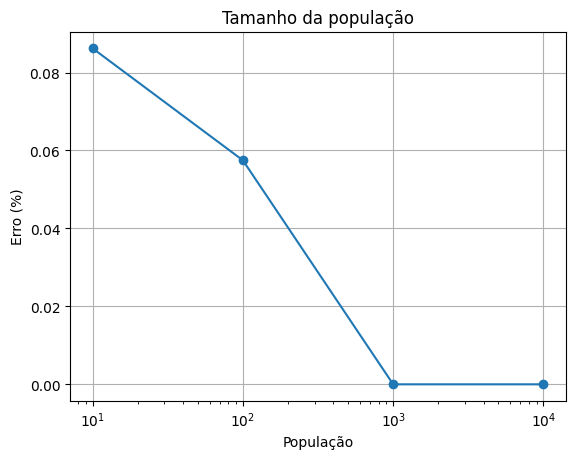

In [ ]:
plt.title("Tamanho da população")
plt.xlabel("População")
plt.ylabel("Erro (%)")
plt.xscale("log")
plt.grid(True)
plt.plot(
    analysis_by_population["População"], analysis_by_population["Erro"], marker="o"
)
plt.show()

In [9]:
## Variando o número de gerações

population_size = 10
mutation_rate = 0.1

results = []
for generations in [10, 100, 1000, 10000]:
    results.extend(
        compare_knapstack_algorithms(
            ITEMS, MAX_WEIGHT, population_size, generations, mutation_rate
        )[0]
    )

analysis_by_generations = pd.DataFrame(results)

analysis_by_generations.head()

,População,Gerações,Taxa de mutação,Valor,Valor ótimo,Erro,Tempo (s)
0,10,10,0.1,795,870,0.086207,0.001056
1,10,100,0.1,770,870,0.114943,0.009675
2,10,1000,0.1,770,870,0.114943,0.131513
3,10,10000,0.1,700,870,0.195402,0.814236


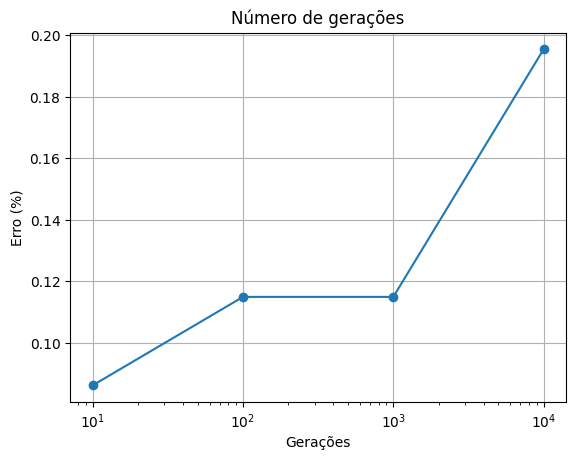

In [10]:
plt.title("Número de gerações")
plt.xlabel("Gerações")
plt.ylabel("Erro (%)")
plt.xscale("log")
plt.grid(True)
plt.plot(
    analysis_by_generations["Gerações"], analysis_by_generations["Erro"], marker="o"
)
plt.show()

In [11]:
## Variando a taxa de mutação

population_size = 100
generations = 100

results = []
for mutation_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    results.extend(
        compare_knapstack_algorithms(
            ITEMS, MAX_WEIGHT, population_size, generations, mutation_rate
        )[0]
    )

analysis_by_mutation_rate = pd.DataFrame(results)

analysis_by_mutation_rate.head()

,População,Gerações,Taxa de mutação,Valor,Valor ótimo,Erro,Tempo (s)
0,100,100,0.1,835,870,0.040230,0.140617
1,100,100,0.2,795,870,0.086207,0.136518
2,100,100,0.3,740,870,0.149425,0.141792
3,100,100,0.4,665,870,0.235632,0.140086
4,100,100,0.5,750,870,0.137931,0.140667


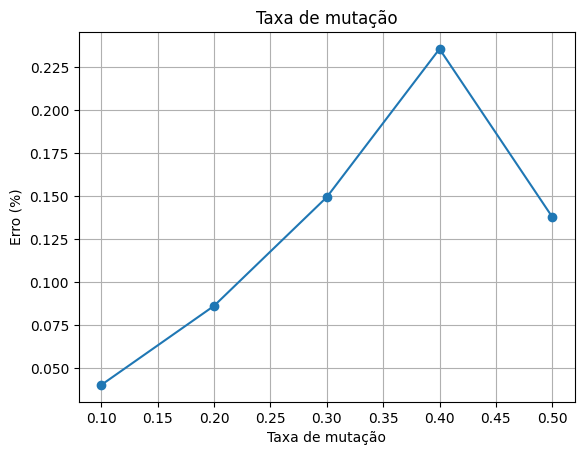

In [12]:
plt.title("Taxa de mutação")
plt.xlabel("Taxa de mutação")
plt.ylabel("Erro (%)")
plt.grid(True)
plt.plot(
    analysis_by_mutation_rate["Taxa de mutação"],
    analysis_by_mutation_rate["Erro"],
    marker="o",
)
plt.show()